In [3]:
import pandas as pd
import matplotlib as plt
import sklearn as sk

atac_raw = pd.read_csv("data/ATAC.csv")

In [11]:
atac_raw.columns

Index(['ImmGenATAC1219.peakID', 'chrom', 'Summit',
       'mm10.60way.phastCons_scores', '_-log10_bestPvalue',
       'Included.in.systematic.analysis', 'TSS', 'genes.within.100Kb',
       'LTHSC.34-.BM', 'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM',
       'proB.CLP.BM', 'proB.FrA.BM', 'proB.FrBC.BM', 'preB.FrD.BM', 'B.FrE.BM',
       'B1b.PC', 'B.T1.Sp', 'B.T2.Sp', 'B.T3.Sp', 'B.Sp', 'B.Fem.Sp',
       'B.MZ.Sp', 'B.Fo.Sp', 'B.mem.Sp', 'B.GC.CB.Sp', 'B.GC.CC.Sp', 'B.PB.Sp',
       'B.PC.Sp', 'B.PC.BM', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
       'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
       'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.8.Nve.Sp', 'T.4.Sp.aCD3+CD40.18hr',
       'Treg.4.FP3+.Nrplo.Co', 'Treg.4.25hi.Sp', 'T8.TN.P14.Sp',
       'T8.IEL.LCMV.d7.SI', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d',
       'Tgd.g2+d17.24a+.Th',

In [5]:
atac_ilc = atac_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]

In [12]:
atac_ilc.columns

Index(['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI'],
      dtype='object')

In [5]:
print(atac_ilc.isnull().sum())

NK.27+11b-.BM          0
NK.27+11b+.BM          0
NK.27-11b+.BM          0
NK.27+11b-.Sp          0
NK.27+11b+.Sp          0
NK.27-11b+.Sp          0
ILC2.SI                0
ILC3.NKp46-CCR6-.SI    0
ILC3.NKp46+.SI         0
ILC3.CCR6+.SI          0
dtype: int64


In [13]:
atac_raw = atac_raw.dropna()

In [14]:
import scanpy as sc
import anndata as ad

adata = sc.AnnData(atac_ilc)


/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [15]:
sc.pp.normalize_total(adata)   # make total accessibility per cell = 1e4
sc.pp.log1p(adata)             # log-transform to stabilize variance


In [16]:
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]  # subset


In [17]:
sc.pp.scale(adata)  # center and scale
sc.tl.pca(adata, svd_solver='arpack')


/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/scanpy/preprocessing/_scale.py:318: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)


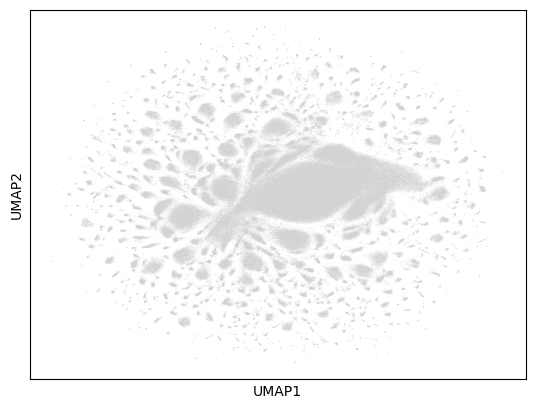

In [19]:
sc.tl.umap(adata)
sc.pl.umap(adata)


In [6]:
import scanpy as sc

adata = sc.AnnData(atac_ilc)



/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
print(adata)


AnnData object with n_obs × n_vars = 512595 × 10


In [20]:
print(adata.obs.columns)


Index([], dtype='object')


In [24]:
sc.tl.leiden(adata)

/var/folders/vh/rffjtjt916gdtb214wntxwb80000gn/T/ipykernel_77495/3317440822.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


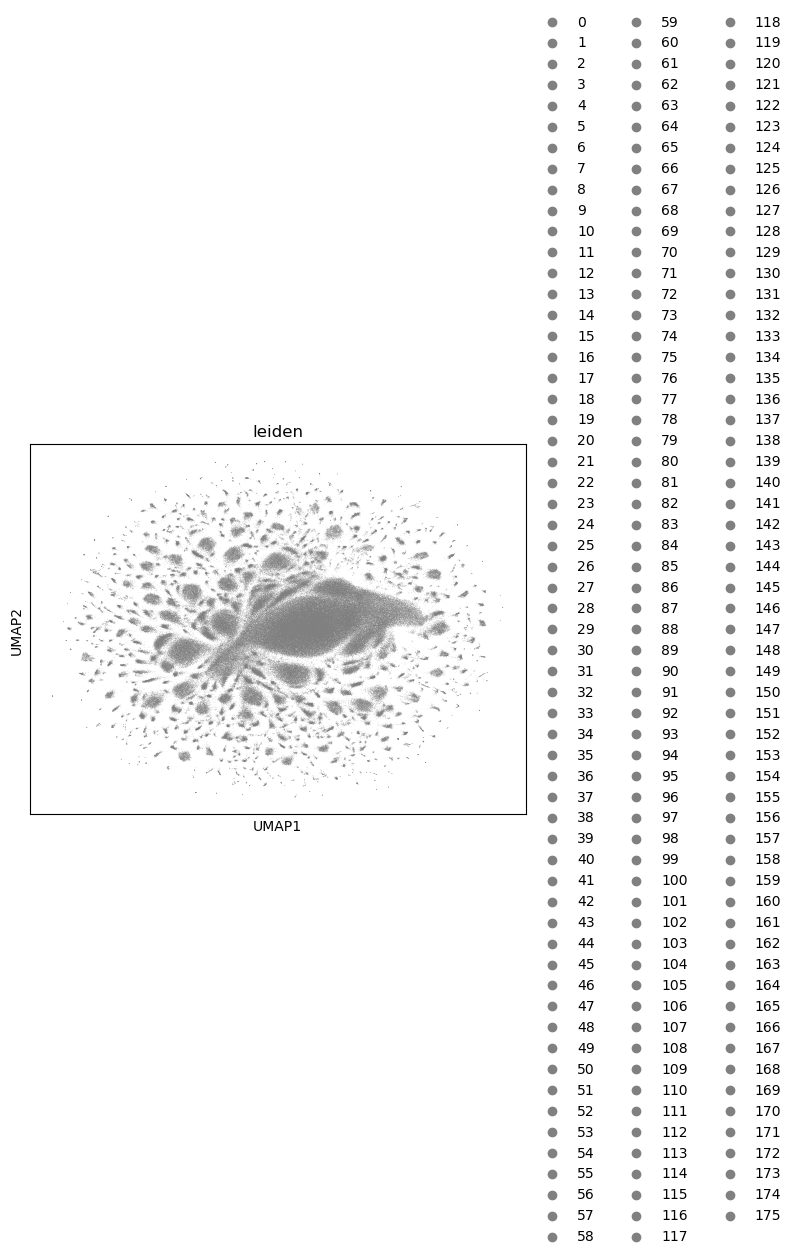

In [25]:
sc.pl.umap(adata, color="leiden")


In [26]:
sc.tl.leiden(adata, resolution=1.0)


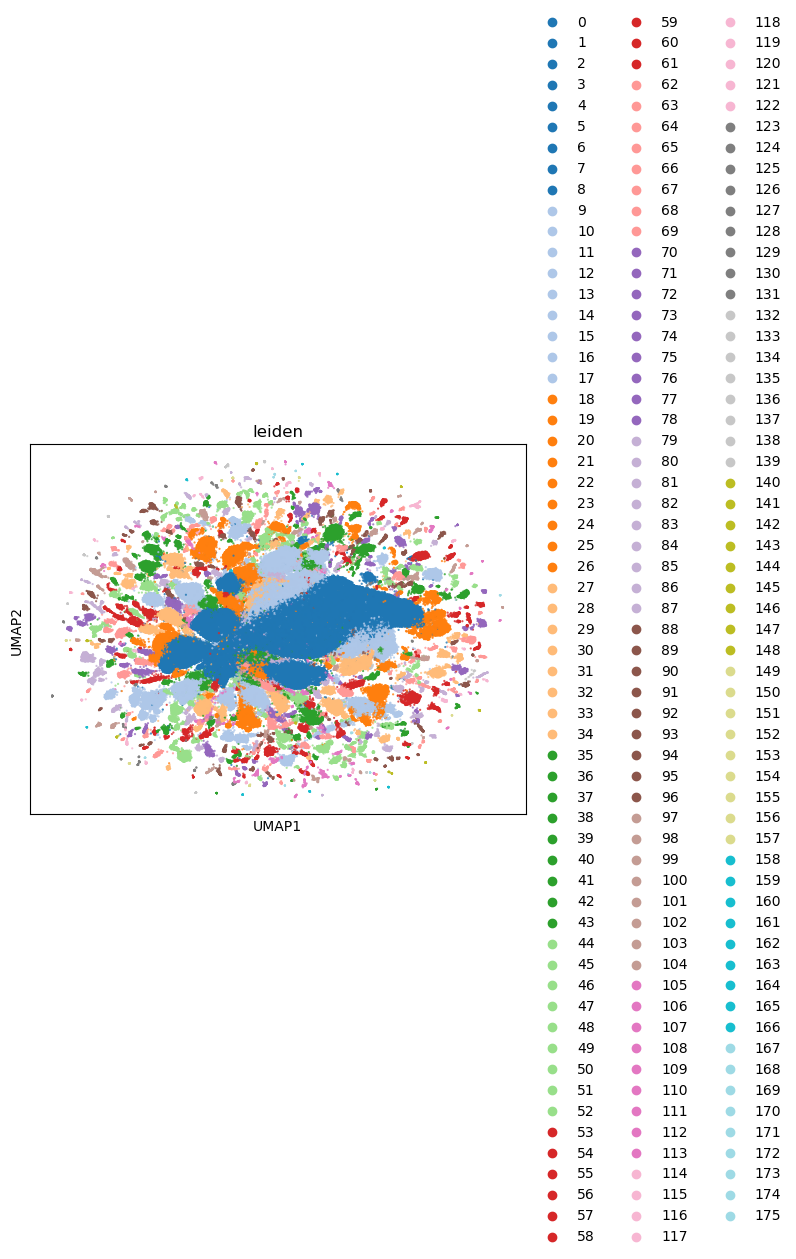

In [27]:
sc.pl.umap(adata, color="leiden", palette='tab20', size=10, alpha=0.8)


/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/kaloyan.kostadinov/miniconda3/envs/data_analysis/lib/python3.9/site-packages/scan

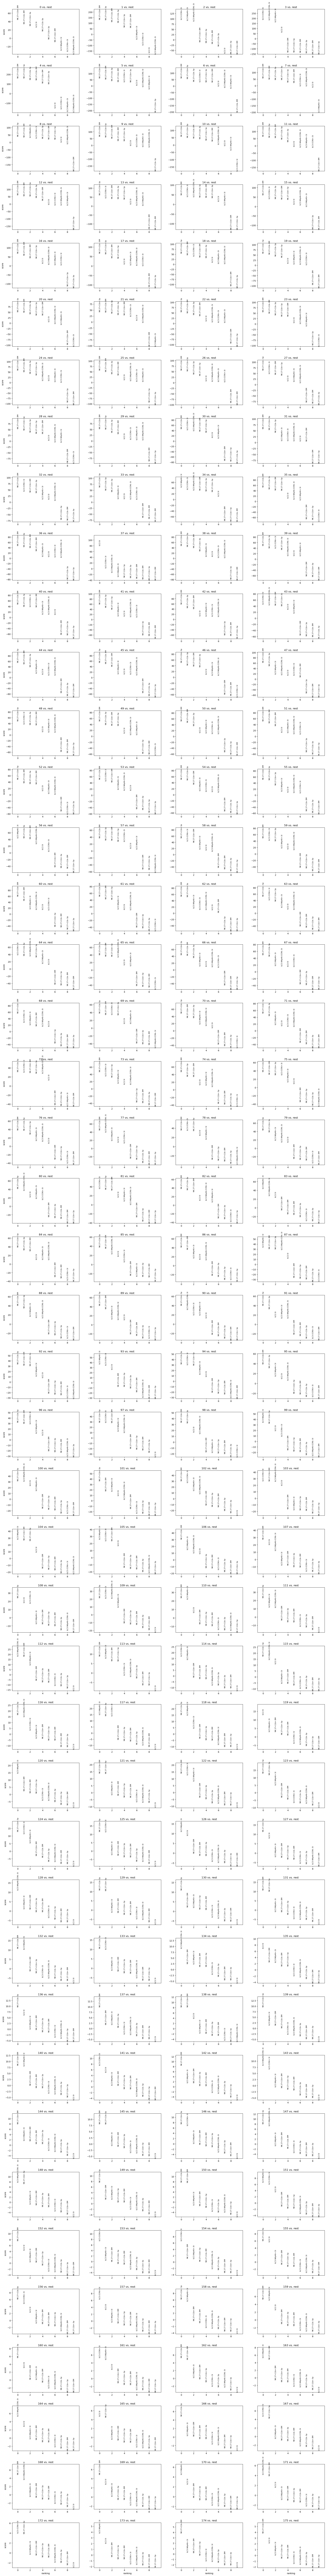

In [28]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)


In [29]:
sc.get.rank_genes_groups_df(adata, group='0').head(5)


names     scores  logfoldchanges          pvals      pvals_adj
0  NK.27+11b+.BM  44.569347             NaN   0.000000e+00   0.000000e+00
1  NK.27+11b-.BM  34.483349             NaN  1.425167e-260  4.750557e-260
2  NK.27+11b+.Sp  29.780874             NaN  6.910912e-195  1.382182e-194
3        ILC2.SI  26.544439             NaN  2.977328e-155  4.253325e-155
4  NK.27+11b-.Sp  17.171377             NaN   4.349693e-66   5.437116e-66